##  Principal Component Analysis ( PCA ) 

PCA is a linear dimensionality reduction technique that can be utilized for extracting information from High-dimensional reduction space by projecting it into lower dimnesional sub-space. 

it tries to preserve the essential parts that have more variations of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels)

### importing the Datasets

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [18]:
breast = load_breast_cancer()

In [8]:
breast_data= load_breast_cancer().data
breast_labels= load_breast_cancer().target

### now we need to reshape the data

so that we can concatenate the data and the labels along the second axis, which means the final shape 569 x 31

In [15]:
labels= np.reshape(breast_labels,(569,1))
final_breast_data= np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

now that so the data is already confirmed and in a shape we wanted it to be

In [17]:
breast_dataset= pd.DataFrame(final_breast_data)

the feature of the dataset

In [23]:
features= breast.feature_names

In [24]:
features_labels = np.append(features,'label')

In [28]:
features_labels

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'], dtype='<U23')

#### now the assign the feature to the columns

In [30]:
breast_dataset.columns= features_labels

In [32]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


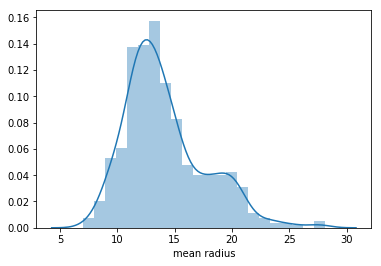

In [42]:
sns.distplot(breast_dataset['mean radius'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


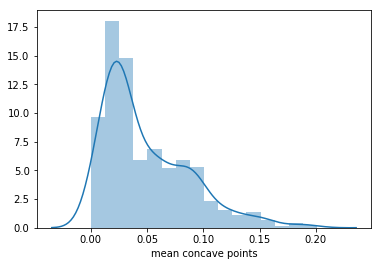

In [43]:

sns.distplot(breast_dataset['mean concave points'])

### Normalized the dataset
since it is numerical it is important to note that the numerical values need to be "normalized" or "standardized" 

In [55]:
from sklearn.preprocessing import StandardScaler
X= breast_dataset.loc[:,features].values
X= StandardScaler().fit_transform(X)

### checking if the data already standardized / normalized
by checking the mean and the standard deviation 

In [57]:
np.mean(X), np.std(X)

(-6.118909323768877e-16, 1.0)

### now we need to transform back so that it will be a dataframe

In [64]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
# feat_cols
normalised_breast = pd.DataFrame(X,columns=feat_cols)

In [67]:
normalised_breast.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## this is where the fun part begins 
#### developing the PCA 

In [70]:
from sklearn.decomposition import PCA
number= 2
pca_breast= PCA(n_components=number)
principalComponents_breast= pca_breast.fit_transform(X)

#### now as we can see that the dataframe already on the 2 feature, reduced down from the 30 features. when dealing with the huge datasets it is really helpful and will definitely give impact on the machine learning modeling 


In [103]:
principal_breast_Df= pd.DataFrame(principalComponents_breast)
principal_breast_Df.head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


- Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [75]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


from above information it shows that the principal component 1 holds around 0.44 ( 44% ) of the information while the principal component 2 holds around only 19 %  of the information 


from that point it means from 100% information , around 37 % data information was lost. 

In [104]:
principal_breast_Df_2= principal_breast_Df
principal_breast_Df_2.columns = ['principal component 1','principal component 2']
principal_breast_Df_2


,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
5,2.380247,3.949929
6,2.238883,-2.690031
7,2.143299,2.340244
8,3.174924,3.391813
9,6.351747,7.727174


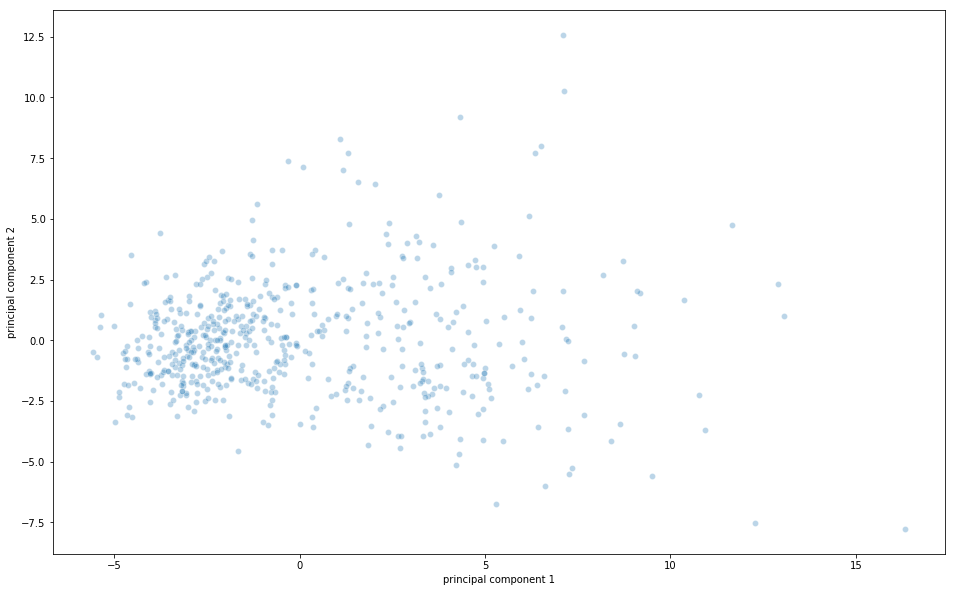

In [105]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=principal_breast_Df_2,
    legend="full",
    alpha=0.3
)